In [1]:
import os
path = os.getcwd()

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1 读取数据

In [3]:
data = pd.read_csv(path + '/creditcard.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2 数据探索

In [5]:
features = list(data.columns)
features[0] = 'Class'
features[-1] = 'Time'

## 2.1 各特征与类别标签间的统计关系

In [6]:
# 导入统计分析模块
from scipy import stats

# 察看各变量间的P值与拟合情况
statistic = []
for i in range(len(features) - 1):
    for j in range(i + 1, len(features)):
        stat = []
        # 计算两变量间的相关系数、P值
        r, p = stats.pearsonr(data[features[i]], data[features[j]])
        stat.append(features[i])
        stat.append(features[j])
        stat.append(r)
        stat.append(p)
        statistic.append(stat)

In [7]:
feature_stats = pd.DataFrame(statistic,
                             columns = ['FEATURE_X',
                                        'FEATURE_Y',
                                        'PERSON_R',
                                        'P']
                            )
del statistic

In [8]:
feature_stats

,FEATURE_X,FEATURE_Y,PERSON_R,P
0,Class,V1,-1.013473e-01,0.000000e+00
1,Class,V2,9.128865e-02,0.000000e+00
2,Class,V3,-1.929608e-01,0.000000e+00
3,Class,V4,1.334475e-01,0.000000e+00
4,Class,V5,-9.497430e-02,0.000000e+00
5,Class,V6,-4.364316e-02,4.213111e-120
6,Class,V7,-1.872566e-01,0.000000e+00
7,Class,V8,1.987512e-02,2.740673e-26
8,Class,V9,-9.773269e-02,0.000000e+00
9,Class,V10,-2.168829e-01,0.000000e+00


In [9]:
feature_stats.to_csv(path + '/feature_stats.csv', index = None, sep = '\t')
del feature_stats

## 2.2 各特征与类别标签间的相关性可视化

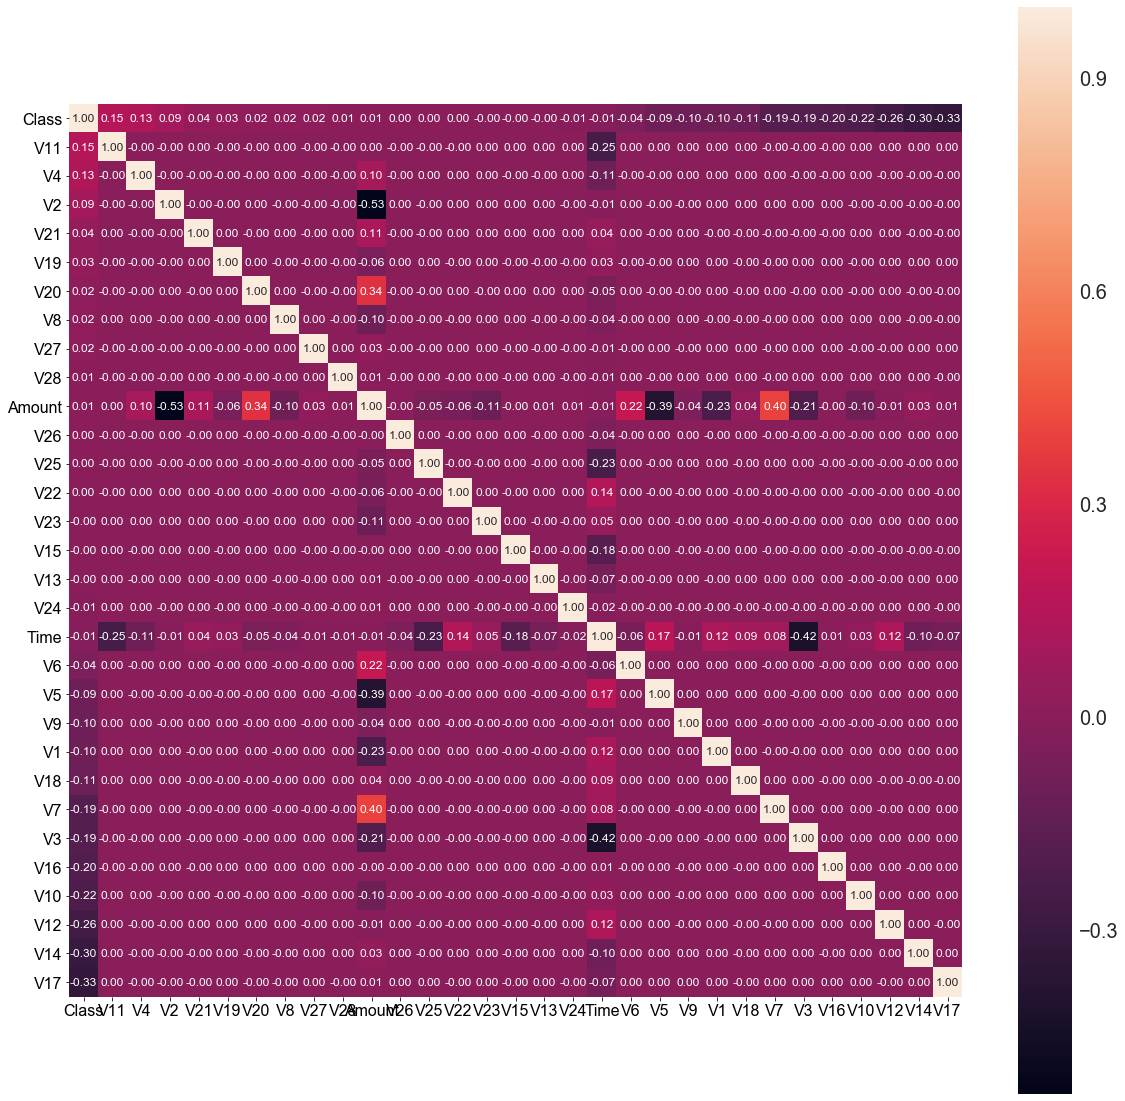

In [10]:
# 相关系数显示
corr = data[features].corr()
feature_nums =  len(features)
cols =  corr.nlargest(feature_nums, 'Class')['Class'].index
cm = np.corrcoef(data[cols].values.T)

f, ax = plt.subplots(figsize = (20, 20))
sns.set(font_scale = 2)
hm = sns.heatmap(cm,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '.2f',
                 annot_kws = {'size' : 12},
                 yticklabels = cols.values,
                 xticklabels = cols.values
                )

# 设置刻度字体大小  
plt.xticks(fontsize = 16) 
plt.yticks(fontsize = 16)
plt.show()

In [ ]:
# 可视化变量间的相关性
fig = plt.figure(figsize = (12, 8))
for i in range(1, len(features)):
    data_sub = pd.concat([data['Class'], data[features[i]]], axis = 1)
    sns.set_palette('muted')
    sns.jointplot(x = 'Class',
                  y = features[i],
                  data = data_sub,
                  kind = 'reg',
                  color = 'r',
                  space = 0.5,
                  ratio = 5)
    plt.title('Class' + ' - ' + features[i], fontsize = 16)
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签  
    plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has